In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

C:\Users\Sobhan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
len(X_train), len(X_test)

(60000, 10000)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[5].shape

(28, 28)

In [7]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

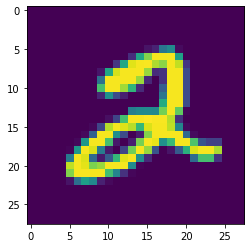

In [8]:
plt.imshow(X_train[5])

In [9]:
y_train[5]

2

In [10]:
X_train = X_train / 255

X_test = X_test / 255

In [11]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_train[5].shape

(784,)

In [15]:
X_train[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

ANN

In [16]:
model = keras.Sequential([
    keras.layers.Dense(256, activation = "relu", input_shape=(784,)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2695 - accuracy: 0.9223 - val_loss: 0.1301 - val_accuracy: 0.9617
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1069 - accuracy: 0.9682 - val_loss: 0.0894 - val_accuracy: 0.9733
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0695 - accuracy: 0.9791 - val_loss: 0.0733 - val_accuracy: 0.9767
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0804 - val_accuracy: 0.9738
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0840 - val_accuracy: 0.9736
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0744 - val_accuracy: 0.9784
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0744 - val_accuracy: 0.9777
Epoch 

In [20]:
test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9789


In [21]:
print("Test accuracy:", test_acc)

Test accuracy: [0.0982728898525238, 0.9789000153541565]


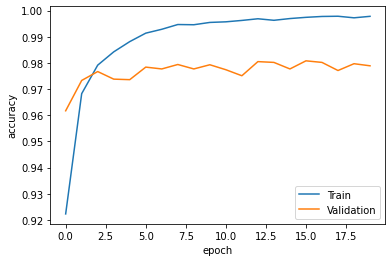

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train", "Validation"]) 
plt.show()

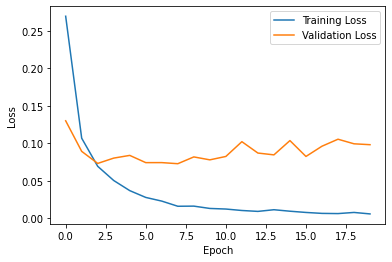

In [23]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [24]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[2.58700217e-09, 7.64101116e-10, 1.22603747e-10, ...,
        1.00000000e+00, 1.48263482e-13, 8.73300210e-10],
       [1.69406030e-14, 4.60368085e-07, 9.99999523e-01, ...,
        6.43916564e-16, 4.83820510e-14, 7.49399243e-24],
       [5.72170566e-13, 9.99999404e-01, 6.87948409e-09, ...,
        4.91956609e-09, 6.16811235e-07, 1.90422900e-14],
       ...,
       [3.98650101e-18, 3.87755962e-14, 6.83403594e-18, ...,
        4.16359273e-11, 8.12513360e-13, 1.14223048e-10],
       [7.35220824e-19, 1.16106834e-17, 5.28190781e-23, ...,
        1.40658807e-16, 2.87258146e-13, 1.25004382e-23],
       [6.42105723e-19, 2.84992772e-17, 2.23314943e-16, ...,
        3.43779292e-21, 2.65397219e-18, 1.99891652e-20]], dtype=float32)

In [25]:
y_predicted = model.predict(X_test)
y_predicted[7]

313/313 [==============================] - 1s 2ms/step


array([2.53963246e-13, 6.63251051e-11, 2.08723094e-07, 1.18521946e-07,
       2.59078161e-06, 8.02565182e-07, 5.19208730e-17, 1.89686311e-08,
       1.18809951e-09, 9.99996305e-01], dtype=float32)

In [26]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

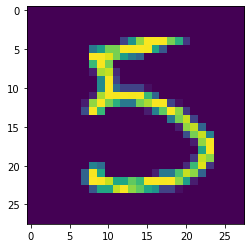

In [27]:
plt.imshow(X_test[15])

In [28]:
np.argmax(y_predicted[15])

5

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

In [31]:
cmatrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [32]:
cmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    0,    2,    3,    0,    1,    0],
       [   0, 1128,    0,    3,    0,    0,    2,    1,    1,    0],
       [   3,    6, 1010,    6,    1,    0,    0,    1,    5,    0],
       [   0,    0,    6,  995,    0,    3,    0,    2,    3,    1],
       [   1,    1,    6,    0,  964,    1,    2,    2,    0,    5],
       [   2,    1,    0,   12,    1,  870,    3,    0,    2,    1],
       [   2,    5,    0,    1,    3,    4,  941,    0,    2,    0],
       [   2,    7,   10,    2,    0,    0,    0, 1002,    2,    3],
       [   2,    2,   17,    4,    3,    5,    0,    5,  934,    2],
       [   3,    4,    1,    6,   10,    6,    0,    3,    3,  973]])>

Text(69.0, 0.5, 'Actual')

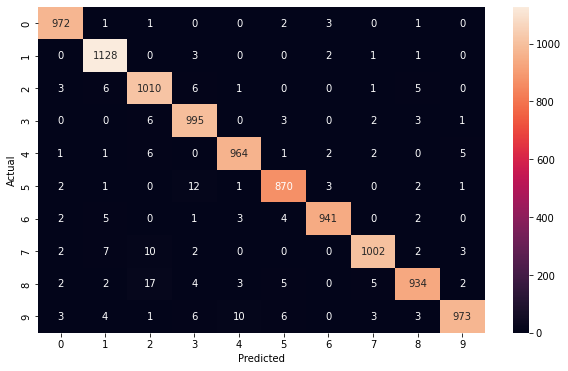

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(cmatrix, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN

In [34]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [36]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
469/469 [==============================] - 30s 62ms/step - loss: 0.2005 - accuracy: 0.9426 - val_loss: 0.0656 - val_accuracy: 0.9791
Epoch 2/20
469/469 [==============================] - 29s 61ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0395 - val_accuracy: 0.9876
Epoch 3/20
469/469 [==============================] - 28s 61ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0366 - val_accuracy: 0.9885
Epoch 4/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0300 - val_accuracy: 0.9895
Epoch 5/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 6/20
469/469 [==============================] - 28s 59ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 7/20
469/469 [==============================] - 28s 61ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0364 - val_accuracy:

In [38]:
test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0356 - accuracy: 0.9922


In [39]:
print("Test accuracy:", test_acc)

Test accuracy: [0.03563258796930313, 0.9922000169754028]


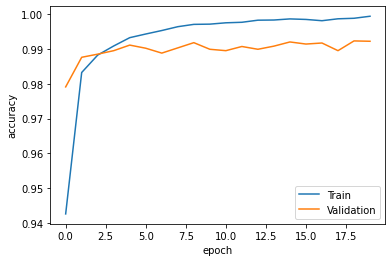

In [40]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train", "Validation"]) 
plt.show()

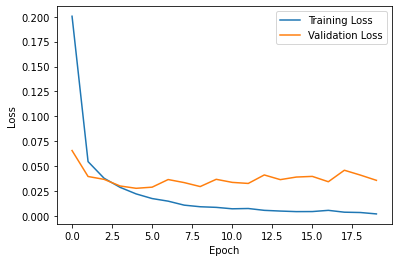

In [41]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [42]:
model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


array([[1.3658457e-14, 3.5802514e-14, 6.1058051e-12, ..., 1.0000000e+00,
        7.0818638e-18, 8.5098663e-14],
       [8.1922374e-16, 2.3278274e-17, 1.0000000e+00, ..., 1.0300522e-23,
        1.4059965e-18, 1.9908005e-24],
       [2.9638014e-09, 1.0000000e+00, 9.6716960e-14, ..., 9.9651158e-09,
        3.4925793e-12, 4.9982029e-13],
       ...,
       [1.9501890e-31, 5.5972852e-24, 1.7944553e-30, ..., 3.0579033e-22,
        3.0221007e-17, 1.8095747e-19],
       [2.1833321e-17, 2.2985774e-23, 6.8766744e-22, ..., 6.6381762e-23,
        3.7769411e-08, 2.9401158e-23],
       [7.0358982e-18, 1.3054285e-18, 4.2097737e-14, ..., 1.2926384e-26,
        8.2950445e-14, 3.8333617e-23]], dtype=float32)

In [43]:
y_predicted = model.predict(X_test)
y_predicted[10]

313/313 [==============================] - 2s 7ms/step


array([1.0000000e+00, 6.2921529e-20, 1.7450758e-13, 4.8140246e-22,
       2.8699223e-19, 4.0023033e-25, 4.1442007e-17, 6.0514106e-18,
       3.5915041e-17, 1.1148560e-10], dtype=float32)

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [45]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [46]:
cmatrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [47]:
cmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    0,    0,    1,    2,    0],
       [   0, 1129,    0,    1,    1,    2,    0,    0,    2,    0],
       [   0,    0, 1022,    2,    1,    0,    0,    6,    1,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    0,    3,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    1,    3],
       [   0,    0,    1,    7,    0,  883,    1,    0,    0,    0],
       [   3,    2,    1,    0,    1,    1,  949,    0,    1,    0],
       [   0,    2,    3,    0,    0,    0,    0, 1022,    0,    1],
       [   2,    0,    3,    1,    0,    0,    0,    2,  966,    0],
       [   1,    0,    1,    0,    8,    2,    1,    3,    1,  992]])>

Text(69.0, 0.5, 'Actual')

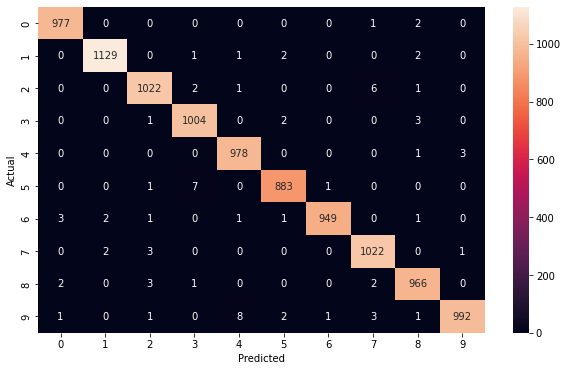

In [48]:
plt.figure(figsize = (10,6))
sns.heatmap(cmatrix, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

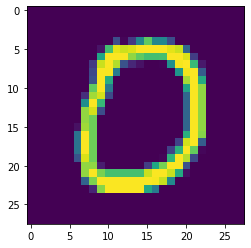

In [49]:
plt.imshow(X_test[10])

In [50]:
np.argmax(y_predicted[10])

0

RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [52]:
mnist = fetch_openml("mnist_784", version = 1)
X, y = mnist["data"], mnist["target"]

C:\Users\Sobhan\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [53]:
X = X / 255.0

In [54]:
X_train, y_train = X[:50000], y[:50000]
X_val, y_val = X[50000:60000], y[50000:60000]
X_test, y_test = X[60000:], y[60000:]

In [55]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = 28)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=28)

In [57]:
y_pred = rf.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.9508


In [58]:
y_pred = rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_acc)

Test accuracy: 0.948
